In [1]:
%pip install stability-sdk

     ---------------------------------------- 1.8/1.8 MB 9.0 MB/s eta 0:00:00
     ------------------------------------- 904.2/904.2 kB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.12.3
    Uninstalling protobuf-3.12.3:
      Successfully uninstalled protobuf-3.12.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.47.0
    Uninstalling grpcio-1.47.0:
      Successfully uninstalled grpcio-1.47.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [1]:
import getpass, os

# NB: host url is not prepended with \"https\" nor does it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'],
    verbose=True,
)

In [34]:
import random

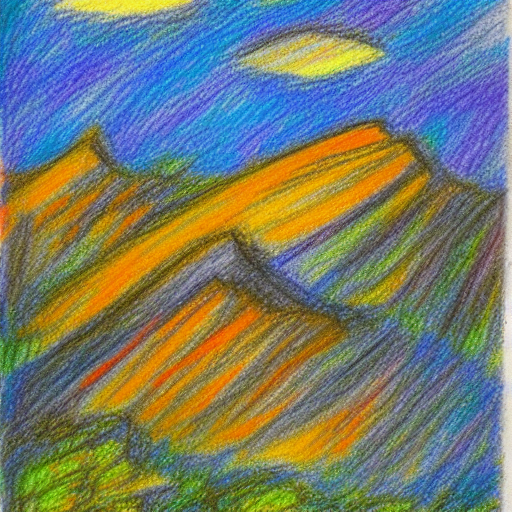

In [79]:
# the object returned is a python generator
answers = stability_api.generate(
    prompt="chilrens crayon drawing of a mountain range",
    #seed=72446, # if provided, specifying a random seed makes results deterministic
    steps=30, # defaults to 50 if not specified
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

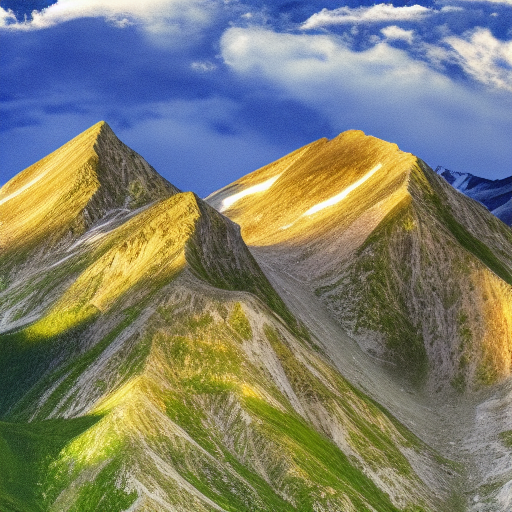

In [80]:

answers = stability_api.generate(
    prompt = 'a high quality realistic photo of a beautiful mountain range, 8K UHD',
    init_image = img,
    seed = random.randint(0, 10000),
    steps = 30,
    start_schedule = 0.79,
)
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)